In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib

import matplotlib.pyplot as plt

# Dataset Creation

In [4]:
data = pd.DataFrame(pd.read_csv('dataset/train_100k.csv'))
data

,customer_id,gender,latitude_x,longitude_x,latitude_y,longitude_y,vendor_category_en,delivery_charge,serving_distance,commission,delivery_available,discount_percentage,language,rank,restaurent_rating,restaurent_tag_name,restaurant_id
0,SZ5JI7X,male,-0.5050,0.0950,0.6187,0.5273,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",106
1,WKYG878,male,0.2096,0.2810,-0.6010,0.0960,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,1,4.4,"American,Burgers,Desserts,Mojitos ,Pasta",90
2,UXCWXNG,male,0.1357,-78.6000,0.6187,0.5273,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",106
3,B9HSJBN,male,-0.8800,0.0755,-0.6010,0.0960,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,1,4.4,"American,Burgers,Desserts,Mojitos ,Pasta",90
4,K3RGL6T,male,0.3879,0.5815,-0.1150,0.5460,Restaurants,0.7,15.0,0.0,Yes,0.0,EN,11,4.3,"American,Burgers,Fries,Sandwiches",43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,949SKDG,male,0.6953,-78.7000,-1.0080,0.0792,Restaurants,0.7,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Fries,Mojitos",289
99996,E5BCNDB,male,-0.3720,-78.5600,1.7030,0.7600,Restaurants,0.7,10.0,0.0,Yes,0.0,EN,11,4.3,"Fresh Juices,Milkshakes,Mojitos ,Sandwiches,Sh...",192
99997,X18R5HU,male,-16.2800,-3.5460,0.0168,0.5479,Restaurants,0.7,15.0,0.0,Yes,35.0,EN,11,4.6,"Asian,Dimsum,Grills,Japanese,Rice,Soups",110
99998,LVRR6EE,male,0.4060,0.5884,0.6187,0.5273,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",106


In [5]:
# convert costumer ID into numbers
customer_ids = data['customer_id'].unique() # get uniquq customers
customer_index = [i for i in range(len(customer_ids))] # create list of index
new_data = pd.DataFrame(data)

# to assign index to unique customers
for i in range(len(customer_ids)):
    print(f'assigning {customer_index[i]} to {customer_ids[i]}')
#     print(f'assigning {i} to {customer_ids[i]}')
    new_data.loc[new_data['customer_id'] == customer_ids[i], 'customer_id_num'] = customer_index[i]
new_data

assigning 0 to SZ5JI7X
assigning 1 to WKYG878
assigning 2 to UXCWXNG
assigning 3 to B9HSJBN
assigning 4 to K3RGL6T
assigning 5 to RLI3ZCV
assigning 6 to TVPZBS6
assigning 7 to E7WCVKD
assigning 8 to 95G818B
assigning 9 to NQP7HXY
assigning 10 to V068NLD
assigning 11 to HJIEYBL
assigning 12 to LVO55D6
assigning 13 to 1JGGTXJ
assigning 14 to 91P269G
assigning 15 to 2NS8HDP
assigning 16 to MKVVKWL
assigning 17 to V7RJLW8
assigning 18 to VBF5W32
assigning 19 to VGAIVWE
assigning 20 to 7TVXQSB
assigning 21 to JXV287F
assigning 22 to 0ECDDSB
assigning 23 to AG5ZJPK
assigning 24 to NEP9BF8
assigning 25 to 4N5MNXV
assigning 26 to M2PLKLD
assigning 27 to K6ATFSP
assigning 28 to 3D3NI9G
assigning 29 to PSFKRQ3
assigning 30 to 5R9VZ83
assigning 31 to XW37IN9
assigning 32 to QMJLT1X
assigning 33 to KRG9MQ2
assigning 34 to 9M3M21S
assigning 35 to SHWYMDW
assigning 36 to E21KCFI
assigning 37 to PVEP9F4
assigning 38 to I1GSL6D
assigning 39 to WPNO7FC
assigning 40 to PBPDB5M
assigning 41 to 6YOA5SN
as

assigning 340 to PA5ONFW
assigning 341 to CW4P918
assigning 342 to DRIDDRW
assigning 343 to VCVR1W0
assigning 344 to 6AREGGV
assigning 345 to I36L9KE
assigning 346 to N8CS6YR
assigning 347 to WIWG4C4
assigning 348 to 0DG9STZ
assigning 349 to Q9JBEIE
assigning 350 to INT7TYD
assigning 351 to A989XJY
assigning 352 to APVLAQ5
assigning 353 to MI6XH8L
assigning 354 to PRMLVM0
assigning 355 to V6WQT92
assigning 356 to CI8ED5Q
assigning 357 to C5JYBKU
assigning 358 to CA768E7
assigning 359 to H61ZK4U
assigning 360 to JCPDWNG
assigning 361 to 1OTMH0I
assigning 362 to IIWRTUD
assigning 363 to IGC43S2
assigning 364 to 34R3I46
assigning 365 to IVX7V4L
assigning 366 to I7K0VC6
assigning 367 to BBN894T
assigning 368 to IVFSYN5
assigning 369 to 4F2VEE7
assigning 370 to 40C8VTT
assigning 371 to MYUBG8E
assigning 372 to EP8Z7JP
assigning 373 to MJI67PF
assigning 374 to AYZOO77
assigning 375 to 9Q9DUZI
assigning 376 to MM0GRQY
assigning 377 to 5RZCUK2
assigning 378 to CIXLEU0
assigning 379 to 3WJY6NN


assigning 681 to 1IYXWGO
assigning 682 to 7CSJNJ3
assigning 683 to R23FOQL
assigning 684 to W77USFD
assigning 685 to G9R4HKF
assigning 686 to YUAGG7U
assigning 687 to Q12G734
assigning 688 to 57V8XZG
assigning 689 to MV5KRVK
assigning 690 to 5M7ZHE1
assigning 691 to JNVC68C
assigning 692 to YG96QWA
assigning 693 to 7FAMDX0
assigning 694 to 26R5DD0
assigning 695 to SET7QLS
assigning 696 to KYCMW7N
assigning 697 to WI86G7G
assigning 698 to K4UFO0V
assigning 699 to X6SAJJU
assigning 700 to 3W4JVGN
assigning 701 to FE81WNW
assigning 702 to 0IZ64UG
assigning 703 to RU7D2ZY
assigning 704 to L9S6OQC
assigning 705 to NLFEI79
assigning 706 to 41VFP8C
assigning 707 to YLYAD7Z
assigning 708 to SH8DVQX
assigning 709 to GTB5USZ
assigning 710 to P62OXFZ
assigning 711 to 2P7I8PG
assigning 712 to X53PNEA
assigning 713 to 7M5FUHJ
assigning 714 to IVNMVXT
assigning 715 to 4U28P8N
assigning 716 to 3KNOK9Q
assigning 717 to 8PBQKLH
assigning 718 to 8TE854F
assigning 719 to VOT01CY
assigning 720 to L8WJXIL


assigning 1021 to 0JKB7JF
assigning 1022 to 1P5RQ9H
assigning 1023 to DKRCEZP
assigning 1024 to 9CNAS69
assigning 1025 to O5F2Y1I
assigning 1026 to AJU7SNW
assigning 1027 to M7BU6GY
assigning 1028 to NBQIH0R
assigning 1029 to 4LKX61S
assigning 1030 to 2IUPDC8
assigning 1031 to PAN8OQT
assigning 1032 to AH3KY7B
assigning 1033 to NBWTD34
assigning 1034 to 952DBJQ
assigning 1035 to D2ACI7U
assigning 1036 to Y5DJOWY
assigning 1037 to OEYD96X
assigning 1038 to 6UIOPSU
assigning 1039 to R8G1BTF
assigning 1040 to RP6W00K
assigning 1041 to A0JVMRG
assigning 1042 to API0EHI
assigning 1043 to AP942J8
assigning 1044 to JAUNP9K
assigning 1045 to 5856BOM
assigning 1046 to EEFZCG4
assigning 1047 to J4VD9AT
assigning 1048 to TBX5K9H
assigning 1049 to OVHMP9N
assigning 1050 to E0ES6OY
assigning 1051 to R11IS7A
assigning 1052 to Z0M4U27
assigning 1053 to TO3GS78
assigning 1054 to 41RUSZP
assigning 1055 to JN61NGK
assigning 1056 to 9Q0SHV2
assigning 1057 to J05KG56
assigning 1058 to AQWRMGT
assigning 10

assigning 1365 to T9MWNZV
assigning 1366 to 0G8T9ES
assigning 1367 to X3ASE54
assigning 1368 to TWQ4IPS
assigning 1369 to U7BHUO5
assigning 1370 to N0DIQJY
assigning 1371 to DU7X78K
assigning 1372 to UCR0MLL
assigning 1373 to TQWXMJ0
assigning 1374 to 5JRNFFM
assigning 1375 to L0FUK2O
assigning 1376 to APR5V8G
assigning 1377 to HPERFQJ
assigning 1378 to PB7R2RS
assigning 1379 to 8OXHBOD
assigning 1380 to TBGJ2W8
assigning 1381 to UT4SNWB
assigning 1382 to AWH0HUD
assigning 1383 to CIAZM3V
assigning 1384 to 8VGLOKV
assigning 1385 to UDVNAPV
assigning 1386 to 7V53UPL
assigning 1387 to NBIFJN3
assigning 1388 to F0P5H2X
assigning 1389 to RA4NWXL
assigning 1390 to V4MCH6W
assigning 1391 to HLEY3F6
assigning 1392 to 9OELQJJ
assigning 1393 to C7XZPC1
assigning 1394 to DFB1R40
assigning 1395 to ZDP0JV6
assigning 1396 to 4Q9R8KO
assigning 1397 to 1MG0BMI
assigning 1398 to 3UK044Q
assigning 1399 to C5OUYTE
assigning 1400 to G2B23W4
assigning 1401 to D5Q6WKA
assigning 1402 to T9CRIHI
assigning 14

assigning 1692 to 9S4RBIP
assigning 1693 to SK4PIUO
assigning 1694 to FIRFXXG
assigning 1695 to 6ZYHMJG
assigning 1696 to 68L0N3S
assigning 1697 to AE1URNM
assigning 1698 to VGAYR39
assigning 1699 to 20E1IQT
assigning 1700 to PIY80ZJ
assigning 1701 to P3CHRD2
assigning 1702 to TOJHVX9
assigning 1703 to 5KVYAFO
assigning 1704 to 0YBUADB
assigning 1705 to 7UGC81I
assigning 1706 to ZR50MOS
assigning 1707 to WB6M30W
assigning 1708 to NADP0U5
assigning 1709 to 4MFZGVP
assigning 1710 to ZD5Z9XP
assigning 1711 to XJ3XB52
assigning 1712 to EQVINNM
assigning 1713 to G9RXU8L
assigning 1714 to MUR3RT3
assigning 1715 to VXBTIMA
assigning 1716 to PL2QOEF
assigning 1717 to ZP7F6O0
assigning 1718 to BLDA0JE
assigning 1719 to 676VTNS
assigning 1720 to Z26DKQO
assigning 1721 to 1259RZ8
assigning 1722 to YHYJ46A
assigning 1723 to TEZQSFH
assigning 1724 to 49U7IJ4
assigning 1725 to W00GK8H
assigning 1726 to ILEQZ08
assigning 1727 to TDY9KSI
assigning 1728 to 1Y3X0WM
assigning 1729 to MMGL66B
assigning 17

assigning 2013 to 3QSQ2KI
assigning 2014 to RIVFKRC
assigning 2015 to MY76Q0Q
assigning 2016 to 2CG58O1
assigning 2017 to K4K9NY7
assigning 2018 to 92QGRZ6
assigning 2019 to KYQJ2ZX
assigning 2020 to FA4U8A7
assigning 2021 to 25P6706
assigning 2022 to NWYTLNI
assigning 2023 to P9E8OOB
assigning 2024 to 6Z490YC
assigning 2025 to 75QTKQ0
assigning 2026 to 94TF7FW
assigning 2027 to MGGV3XP
assigning 2028 to AX73CKF
assigning 2029 to 5ADWBLV
assigning 2030 to 59MW6Z4
assigning 2031 to GJ08KIB
assigning 2032 to FFEBJ7D
assigning 2033 to P61IAEA
assigning 2034 to ZKDG9KF
assigning 2035 to 1Z68K58
assigning 2036 to ZGC1JDW
assigning 2037 to YIG8WQ6
assigning 2038 to V2FST4B
assigning 2039 to ZAQEBXJ
assigning 2040 to B2JXGRT
assigning 2041 to 3JWGOUC
assigning 2042 to S3E8HJ0
assigning 2043 to LQ4V2YJ
assigning 2044 to W2646GF
assigning 2045 to OV45A84
assigning 2046 to 62UIHAV
assigning 2047 to IFD5274
assigning 2048 to BTUXQIR
assigning 2049 to ZB4214W
assigning 2050 to 4RSCQET
assigning 20

assigning 2350 to 037HIN2
assigning 2351 to XELEWE9
assigning 2352 to 4VPFOYZ
assigning 2353 to 90OA8FT
assigning 2354 to JHS4KMN
assigning 2355 to LQL48VL
assigning 2356 to UXYWFI9
assigning 2357 to YPFHD5P
assigning 2358 to 3RPI3ZD
assigning 2359 to FUT2B7B
assigning 2360 to FZOWXBH
assigning 2361 to UDAX8FP
assigning 2362 to 2GHX5LE
assigning 2363 to BH00YDD
assigning 2364 to 1BIAIPR
assigning 2365 to M1G3OA3
assigning 2366 to Z2M5DYT
assigning 2367 to ZXJUND1
assigning 2368 to T5QKRHM
assigning 2369 to KTEX8D3
assigning 2370 to 8XEPMUB
assigning 2371 to A9FLY74
assigning 2372 to FTVQR3A
assigning 2373 to 6LCRLBX
assigning 2374 to MC5KSTT
assigning 2375 to G4X1J8D
assigning 2376 to JE4EZ7X
assigning 2377 to 5ILT9UJ
assigning 2378 to 79DGZZP
assigning 2379 to 0YM9PL8
assigning 2380 to Y19RBYB
assigning 2381 to OG311QZ
assigning 2382 to NYSUWGJ
assigning 2383 to IR9YY7J
assigning 2384 to 3J05GUE
assigning 2385 to M525AJ9
assigning 2386 to 98D29PP
assigning 2387 to 3ZGN4MT
assigning 23

assigning 2672 to 3CJKSR9
assigning 2673 to NATWNF6
assigning 2674 to 30NW3EX
assigning 2675 to WWTBNWW
assigning 2676 to 77KFPB1
assigning 2677 to VZ08EG5
assigning 2678 to RCJ95QK
assigning 2679 to TNBO0XB
assigning 2680 to XDNKH3J
assigning 2681 to NE8IOXU
assigning 2682 to KQH8R8C
assigning 2683 to 055MN2K
assigning 2684 to XW09K81
assigning 2685 to GQXY2H3
assigning 2686 to YSXGGVU
assigning 2687 to T3KF31M
assigning 2688 to 7MO3QFE
assigning 2689 to Y7FLD95
assigning 2690 to PZAJJW2
assigning 2691 to 8DYEX4I
assigning 2692 to S68QEUY
assigning 2693 to NVS71JI
assigning 2694 to BU6HEZA
assigning 2695 to 8WYOTVA
assigning 2696 to IOI1TXX
assigning 2697 to Y4WYQX0
assigning 2698 to 5CN5V1J
assigning 2699 to CNT25CX
assigning 2700 to WFDF1RT
assigning 2701 to 9GPRTNI
assigning 2702 to 1LI50QB
assigning 2703 to 6EZ52FE
assigning 2704 to 2K1CDF5
assigning 2705 to L1OSKTV
assigning 2706 to W7OB6BY
assigning 2707 to QJJN98W
assigning 2708 to QU194LD
assigning 2709 to EF99OWA
assigning 27

assigning 3005 to H77OFTT
assigning 3006 to GFFCG59
assigning 3007 to DOEVHJY
assigning 3008 to UA4ZJH7
assigning 3009 to HJBTOGC
assigning 3010 to SW1IQK3
assigning 3011 to D4QTBFL
assigning 3012 to 2P7WT28
assigning 3013 to 757B1V7
assigning 3014 to V2CQXYN
assigning 3015 to OZH0LRT
assigning 3016 to 502O03I
assigning 3017 to BUIAFFT
assigning 3018 to 761JQU7
assigning 3019 to YWFISJR
assigning 3020 to DH780M8
assigning 3021 to BNX009R
assigning 3022 to XT04LWE
assigning 3023 to HGZPTAJ
assigning 3024 to HOCA7YQ
assigning 3025 to BPQ44OL
assigning 3026 to 5I2O72A
assigning 3027 to ONDB9SS
assigning 3028 to P6I0H2R
assigning 3029 to 9VVZD10
assigning 3030 to VUV5S8Z
assigning 3031 to QAQ7JMD
assigning 3032 to LOLNR09
assigning 3033 to UU5ZJ48
assigning 3034 to KHOGKT8
assigning 3035 to YIG1WJL
assigning 3036 to TI8MQZ0
assigning 3037 to NXVHAK4
assigning 3038 to ZFPLX67
assigning 3039 to IF6R8FH
assigning 3040 to YH8KVXU
assigning 3041 to 5JWHW2V
assigning 3042 to MF1GPQO
assigning 30

assigning 3327 to PFHE0B3
assigning 3328 to OLT8BUN
assigning 3329 to BAWB2AJ
assigning 3330 to ELLY43N
assigning 3331 to YX7RPL3
assigning 3332 to 20T5SI9
assigning 3333 to XYDKKYY
assigning 3334 to SENT40Q
assigning 3335 to A2OAQAH
assigning 3336 to CAYQZ03
assigning 3337 to 5OPT6J0
assigning 3338 to VC7BW6F
assigning 3339 to BTRJJS8
assigning 3340 to MLW0117
assigning 3341 to E73H60G
assigning 3342 to DXHU96T
assigning 3343 to IV7WL24
assigning 3344 to S1P5AUN
assigning 3345 to 2VO1GGL
assigning 3346 to NNZH053
assigning 3347 to 1Z09DSZ
assigning 3348 to RJ6O4H4
assigning 3349 to QXFBICK
assigning 3350 to R0OXVF7
assigning 3351 to YEFLD1R
assigning 3352 to E1L5EUE
assigning 3353 to K4O6XGP
assigning 3354 to ESXV1DC
assigning 3355 to 96AVMWD
assigning 3356 to XFQWXUE
assigning 3357 to CYSREYW
assigning 3358 to 2L7LJUK
assigning 3359 to B8KC6PP
assigning 3360 to G9VHN59
assigning 3361 to YZNLADO
assigning 3362 to SBJUWU8
assigning 3363 to TVD4QOM
assigning 3364 to UKJMXFO
assigning 33

assigning 3648 to A0QKRH4
assigning 3649 to Z3DMU3V
assigning 3650 to 11NFNAR
assigning 3651 to Y9S117R
assigning 3652 to NSAOM7R
assigning 3653 to U9XRUOI
assigning 3654 to XG19DGO
assigning 3655 to NKK2N8J
assigning 3656 to 89HPVH2
assigning 3657 to BRP0U1C
assigning 3658 to AUPO5BN
assigning 3659 to WWEGUFS
assigning 3660 to MPMRM2Q
assigning 3661 to SFAV638
assigning 3662 to FPFF5RG
assigning 3663 to FGQTWQN
assigning 3664 to QEN10E4
assigning 3665 to CKQNQ8Z
assigning 3666 to D2F3TQ8
assigning 3667 to OKOGR8B
assigning 3668 to LU8KI35
assigning 3669 to G8H7HR6
assigning 3670 to 8S4TR8P
assigning 3671 to BYY6I3W
assigning 3672 to MHXD897
assigning 3673 to E2LIL9O
assigning 3674 to E40FE9A
assigning 3675 to PWMH4MJ
assigning 3676 to NMBPUNP
assigning 3677 to 8L73TYL
assigning 3678 to CIP0JCS
assigning 3679 to 2PJE01P
assigning 3680 to 3ZC7RF9
assigning 3681 to P4PLBHW
assigning 3682 to 6TJ87O5
assigning 3683 to 17G68M0
assigning 3684 to HFXH7O7
assigning 3685 to 8SKB0AY
assigning 36

assigning 3986 to 2LKCTL4
assigning 3987 to 1JM3KH5
assigning 3988 to TBRI027
assigning 3989 to 3I9SYCP
assigning 3990 to 661O1O0
assigning 3991 to CPB3TM5
assigning 3992 to 5LNJI6B
assigning 3993 to Y2QG9RV
assigning 3994 to TR5PQCL
assigning 3995 to SY8B1FD
assigning 3996 to N1WZI78
assigning 3997 to DB9TN5D
assigning 3998 to FTDJ5PL
assigning 3999 to 6HEZM5E
assigning 4000 to V0K4QNY
assigning 4001 to 0LMXLU3
assigning 4002 to 0F049DE
assigning 4003 to K3ZSTRN
assigning 4004 to SADNOG8
assigning 4005 to Z8H25QN
assigning 4006 to TPLSLW9
assigning 4007 to TB3QVDU
assigning 4008 to EO3R5VE
assigning 4009 to STQRIXS
assigning 4010 to EL2GN1N
assigning 4011 to HEDNCE2
assigning 4012 to 42DG19M
assigning 4013 to 8QTG515
assigning 4014 to XFVL9C0
assigning 4015 to R2AS7ZF
assigning 4016 to R9GD08G
assigning 4017 to JOTABR9
assigning 4018 to 65VVJVL
assigning 4019 to ESJJCB2
assigning 4020 to RQCIMH0
assigning 4021 to JRK3FYM
assigning 4022 to QY5I838
assigning 4023 to T4F7UCN
assigning 40

assigning 4322 to FJ6FXHO
assigning 4323 to 8GCISRP
assigning 4324 to UORMT4T
assigning 4325 to 8FP8UGQ
assigning 4326 to 2N7PSK1
assigning 4327 to P4KYUI0
assigning 4328 to H21IN5K
assigning 4329 to 5WKEUU6
assigning 4330 to E0CP9Z7
assigning 4331 to PC8F2X1
assigning 4332 to BBTAD95
assigning 4333 to J0LFUTZ
assigning 4334 to FDSIRBW
assigning 4335 to 260W0WT
assigning 4336 to 3UPWKFR
assigning 4337 to 0H48AZC
assigning 4338 to BVEM83I
assigning 4339 to 4D2NDTQ
assigning 4340 to O9C8F9K
assigning 4341 to 1FEVGNF
assigning 4342 to ZRIE70P
assigning 4343 to 4V3NA89
assigning 4344 to 0GNZ58Y
assigning 4345 to 89YKUOR
assigning 4346 to 2TM8U13
assigning 4347 to P79EBDF
assigning 4348 to 80LFKN0
assigning 4349 to EMR0MME
assigning 4350 to K90JG3Y
assigning 4351 to BJRK2TO
assigning 4352 to Y411EBJ
assigning 4353 to IEFKEY7
assigning 4354 to PEVJOWO
assigning 4355 to LUQ0N0Q
assigning 4356 to WB7LA7C
assigning 4357 to NY6E47B
assigning 4358 to FZ09ZQ7
assigning 4359 to KKS6VJO
assigning 43

assigning 4662 to IPDPSGY
assigning 4663 to Y4H39G4
assigning 4664 to B1K39Q2
assigning 4665 to 6N6BK88
assigning 4666 to FG4NAO4
assigning 4667 to INTMMXW
assigning 4668 to 959F162
assigning 4669 to W22ADKY
assigning 4670 to GOXL9FH
assigning 4671 to XMQZ3PO
assigning 4672 to HZVT59S
assigning 4673 to 0H5HJ4U
assigning 4674 to TYVYV27
assigning 4675 to PLLBOBH
assigning 4676 to 8YXGH16
assigning 4677 to PIZR9RY
assigning 4678 to 30N059R
assigning 4679 to YE2EIJL
assigning 4680 to BPE2FZZ
assigning 4681 to OE7VH6Z
assigning 4682 to SIKA776
assigning 4683 to RHR2BC1
assigning 4684 to 1A2UBED
assigning 4685 to OCGBHDB
assigning 4686 to QFTXFYF
assigning 4687 to WPWMRJN
assigning 4688 to LE4ZOQZ
assigning 4689 to N08EE16
assigning 4690 to 1C2YXTT
assigning 4691 to 7SFOXUL
assigning 4692 to A07ALU5
assigning 4693 to 4V2WBW4
assigning 4694 to DDKVBEB
assigning 4695 to ORB70AH
assigning 4696 to IISJ5U1
assigning 4697 to 7MFFKVP
assigning 4698 to 9WVRP32
assigning 4699 to OEM4H2A
assigning 47

assigning 5000 to 3KT6H0A
assigning 5001 to 2IRE3EM
assigning 5002 to 536BDP8
assigning 5003 to Z09D4RI
assigning 5004 to LEG2RO2
assigning 5005 to 6X999X8
assigning 5006 to HV3Y7P3
assigning 5007 to 5OF0JY9
assigning 5008 to EVLNX9L
assigning 5009 to BEUR1XF
assigning 5010 to QUZFQCX
assigning 5011 to 4K8NJVT
assigning 5012 to ROXCWOC
assigning 5013 to AB16Q43
assigning 5014 to SVDG8PX
assigning 5015 to CYK0G39
assigning 5016 to 7FI8P5U
assigning 5017 to RGB77GX
assigning 5018 to 3DDIX53
assigning 5019 to A79YCES
assigning 5020 to SXZKAAL
assigning 5021 to K5EVWRL
assigning 5022 to ZRPY41H
assigning 5023 to 14R161Q
assigning 5024 to E8A5ZQY
assigning 5025 to R0NUT9G
assigning 5026 to NWS5K6H
assigning 5027 to 8XQCDTK
assigning 5028 to 7KR0691
assigning 5029 to ESR9M50
assigning 5030 to 42UHQBA
assigning 5031 to HH9816T
assigning 5032 to L0VSAWL
assigning 5033 to 7DCNQAW
assigning 5034 to W7XB2RO
assigning 5035 to DWAYXXS
assigning 5036 to C0UCF8C
assigning 5037 to 6SXG2N8
assigning 50

assigning 5316 to Q9KENTW
assigning 5317 to GE8HE1M
assigning 5318 to 1ZMGZF1
assigning 5319 to M3U75IF
assigning 5320 to J3TSFAP
assigning 5321 to ZD1UXX8
assigning 5322 to YVCVSFW
assigning 5323 to TFKFBRY
assigning 5324 to 8YP9M1A
assigning 5325 to E1BY4WT
assigning 5326 to NHYRDZO
assigning 5327 to QDX4LPC
assigning 5328 to 2N24XBG
assigning 5329 to A5PQL43
assigning 5330 to DJ4R4O2
assigning 5331 to VEL60S1
assigning 5332 to 9OQF5WS
assigning 5333 to VNZ0PYR
assigning 5334 to NU9GAOC
assigning 5335 to 78KDF9W
assigning 5336 to PVABO71
assigning 5337 to HSTQKNU
assigning 5338 to C9IXVVG
assigning 5339 to BN8ITK1
assigning 5340 to FF7VOR8
assigning 5341 to QYU5873
assigning 5342 to 2I0QXOC
assigning 5343 to 84Y7CQT
assigning 5344 to VWMA31U
assigning 5345 to 6YGBG1F
assigning 5346 to T47HBML
assigning 5347 to MXE1M35
assigning 5348 to JPEZSZ8
assigning 5349 to CWX50AV
assigning 5350 to 6HSEKYJ
assigning 5351 to NGF6DNB
assigning 5352 to 1W1O1M1
assigning 5353 to 3IH656Y
assigning 53

assigning 5645 to XW1RC5G
assigning 5646 to ANP4DXQ
assigning 5647 to I5S863M
assigning 5648 to 53CXHO4
assigning 5649 to EUNIXQA
assigning 5650 to GL6LYS0
assigning 5651 to 0FGFVJD
assigning 5652 to RBDDYQK
assigning 5653 to H25PNDP
assigning 5654 to PQAD0XR
assigning 5655 to W05VW2L
assigning 5656 to 3LB98FC
assigning 5657 to 2JPONUN
assigning 5658 to BP2EKU3
assigning 5659 to BITNF7J
assigning 5660 to NFMV4UD
assigning 5661 to X9ZO28R
assigning 5662 to K7VAQ53
assigning 5663 to 7YNUBKV
assigning 5664 to W9QA0J0
assigning 5665 to GFSVIC7
assigning 5666 to 1V7WLXF
assigning 5667 to RROWCPX
assigning 5668 to C422HCP
assigning 5669 to 8XNLTPH
assigning 5670 to 086S0XK
assigning 5671 to 4ZRP8OZ
assigning 5672 to ONQQLXA
assigning 5673 to 141KIOW
assigning 5674 to E7HX57M
assigning 5675 to KDAYN2Z
assigning 5676 to 16U8B2H
assigning 5677 to CWYWEMX
assigning 5678 to OF5YOLD
assigning 5679 to AFRZV2V
assigning 5680 to THXQGT3
assigning 5681 to Z38XJRL
assigning 5682 to NS1AGIC
assigning 56

assigning 5961 to G1ZSTIU
assigning 5962 to 2WX8MWH
assigning 5963 to BIUUVRV
assigning 5964 to 14ABLI6
assigning 5965 to NOQBQXG
assigning 5966 to C916U5P
assigning 5967 to GKKOFNA
assigning 5968 to WT73FX4
assigning 5969 to 9LVBGW2
assigning 5970 to 6CB9ROI
assigning 5971 to Q4CPDHB
assigning 5972 to UOQ9EW5
assigning 5973 to UU1XSJD
assigning 5974 to 8R7VHU5
assigning 5975 to 6PTIMXR
assigning 5976 to WJSV0GV
assigning 5977 to U6CTIVA
assigning 5978 to 8STMAIL
assigning 5979 to FHTAB4E
assigning 5980 to 1KOIDY6
assigning 5981 to 0S36D4G
assigning 5982 to XMPYY3P
assigning 5983 to 17YRR00
assigning 5984 to QN75FT3
assigning 5985 to 10W6Y7S
assigning 5986 to MRK5KV9
assigning 5987 to 3WWJQ9X
assigning 5988 to FPIY3EE
assigning 5989 to T7F0M98
assigning 5990 to SRE8FML
assigning 5991 to KX015TX
assigning 5992 to EE6DB8A
assigning 5993 to SNTD96I
assigning 5994 to SJIVFI0
assigning 5995 to Q0E5069
assigning 5996 to 8HE5V9A
assigning 5997 to 881WN5N
assigning 5998 to PAH3R06
assigning 59

assigning 6295 to VF9R62R
assigning 6296 to ML2EJ3H
assigning 6297 to GX8K3ZG
assigning 6298 to 92XGDA5
assigning 6299 to EDTWU6K
assigning 6300 to 835HGQG
assigning 6301 to 0EJIU3Y
assigning 6302 to W9GJNEX
assigning 6303 to P1SCVW5
assigning 6304 to VLF2HFQ
assigning 6305 to 5D550XP
assigning 6306 to OD35G4L
assigning 6307 to XJ87O7C
assigning 6308 to EQ17D7B
assigning 6309 to YOLB11G
assigning 6310 to HVHRQ2N
assigning 6311 to GZNES7Z
assigning 6312 to M98XXXR
assigning 6313 to T8M8ZCC
assigning 6314 to FLD5CZJ
assigning 6315 to 4E44Y3B
assigning 6316 to ZIJ3YZE
assigning 6317 to JOHG6NM
assigning 6318 to E1ZXSFI
assigning 6319 to 6E4TG5L
assigning 6320 to R7MG8OT
assigning 6321 to M1AMD2U
assigning 6322 to APG9SH3
assigning 6323 to XVQV8P5
assigning 6324 to SGVJML5
assigning 6325 to WDXKKPD
assigning 6326 to XGVP3U9
assigning 6327 to 4SPO4N8
assigning 6328 to 6OIMSFQ
assigning 6329 to MNOBY47
assigning 6330 to IEGJ7D5
assigning 6331 to J55WOVJ
assigning 6332 to TAMDYNV
assigning 63

assigning 6619 to 1VGJ69S
assigning 6620 to DISIA4N
assigning 6621 to PSKDNW3
assigning 6622 to NMI0DNB
assigning 6623 to 3OLVCRO
assigning 6624 to GESS7RX
assigning 6625 to YJ1HCT9
assigning 6626 to ONZ400S
assigning 6627 to 9V12A1K
assigning 6628 to 7Q1RL5E
assigning 6629 to 8MP50QJ
assigning 6630 to 94XZPT4
assigning 6631 to 8TFYVE6
assigning 6632 to 96R6ZP5
assigning 6633 to QN4NYXN
assigning 6634 to M836BCP
assigning 6635 to DM7N8NV
assigning 6636 to MFD4QW4
assigning 6637 to TVU35BN
assigning 6638 to SRI0MGZ
assigning 6639 to 38338WJ
assigning 6640 to MXN60X0
assigning 6641 to T0LIPTH
assigning 6642 to TGISWY6
assigning 6643 to 9XDDOC9
assigning 6644 to 0ZZTCNV
assigning 6645 to W2FNZNS
assigning 6646 to 7I2PJER
assigning 6647 to NB6B5GM
assigning 6648 to JYQY993
assigning 6649 to 5WGFAIE
assigning 6650 to V04JRH4
assigning 6651 to C9JPX95
assigning 6652 to TJCMXNZ
assigning 6653 to A4MJFTC
assigning 6654 to I4PZ6TH
assigning 6655 to H8HBTJB
assigning 6656 to ZJ1SWIG
assigning 66

assigning 6952 to 863JTQU
assigning 6953 to DDYEK4T
assigning 6954 to F06VLO5
assigning 6955 to DPYFJQ9
assigning 6956 to DG4CXQX
assigning 6957 to KS6OPHF
assigning 6958 to S0IIUDU
assigning 6959 to SCABVD0
assigning 6960 to 786PBA6
assigning 6961 to MI0LLWY
assigning 6962 to WF8BS04
assigning 6963 to QDXLWM7
assigning 6964 to 49S6PBZ
assigning 6965 to FBUIYCN
assigning 6966 to WGZPM4O
assigning 6967 to V01YE92
assigning 6968 to 499WU7B
assigning 6969 to 39YBGMX
assigning 6970 to Z75VMM9
assigning 6971 to HY2LE0V
assigning 6972 to AB3IZ8B
assigning 6973 to 1ZDN3O1
assigning 6974 to F82954T
assigning 6975 to 8J13AZD
assigning 6976 to BDC22ES
assigning 6977 to NBH5YBK
assigning 6978 to XSZKK1Y
assigning 6979 to L3GZ4XK
assigning 6980 to 78ANL1S
assigning 6981 to ZX53F3D
assigning 6982 to 7BB6814
assigning 6983 to W0AF4AR
assigning 6984 to NI0ZUD0
assigning 6985 to 8OMI6HY
assigning 6986 to 7Q7UQO4
assigning 6987 to LTRXY03
assigning 6988 to XHZG0JH
assigning 6989 to DV5EU7L
assigning 69

assigning 7276 to M2T4D74
assigning 7277 to EVOH4WB
assigning 7278 to BN6Y7U0
assigning 7279 to L48LMTP
assigning 7280 to BNZ75P7
assigning 7281 to RVSLQ3B
assigning 7282 to OZA2H0H
assigning 7283 to HBSANXL
assigning 7284 to GD7OYN0
assigning 7285 to V41ZONJ
assigning 7286 to PCZ63J4
assigning 7287 to IZHFX34
assigning 7288 to VUGN0S1
assigning 7289 to LPHUO32
assigning 7290 to REHZITA
assigning 7291 to WPURCQ3
assigning 7292 to IWVGFL6
assigning 7293 to W4I16CN
assigning 7294 to 1W0AW9A
assigning 7295 to 4GLNWPD
assigning 7296 to 6TYOZLZ
assigning 7297 to ZPMUJTE
assigning 7298 to 891G0JF
assigning 7299 to SP6IOYI
assigning 7300 to GDKAX8B
assigning 7301 to 2QAI4OH
assigning 7302 to K9COSTL
assigning 7303 to HG2180D
assigning 7304 to 90ZJ9RM
assigning 7305 to KFZI138
assigning 7306 to Q9AB3UG
assigning 7307 to EA78F27
assigning 7308 to B97HZHV
assigning 7309 to CI551MQ
assigning 7310 to WEIS7JO
assigning 7311 to AGQ06TX
assigning 7312 to 4PDBEWC
assigning 7313 to NB1A8ET
assigning 73

assigning 7597 to E8JQ8OP
assigning 7598 to UB5YFAF
assigning 7599 to II0G2DO
assigning 7600 to 4XN0L84
assigning 7601 to O6OCDNH
assigning 7602 to 5MB84OY
assigning 7603 to HQAF0G3
assigning 7604 to ZGXL5KO
assigning 7605 to JCARK4H
assigning 7606 to UBAAZFC
assigning 7607 to SREW2E6
assigning 7608 to 8LBCM5O
assigning 7609 to HXXEMA7
assigning 7610 to N3C8FIV
assigning 7611 to 9X7BFN2
assigning 7612 to NU7K1NC
assigning 7613 to HNP88Z0
assigning 7614 to OUMN4BP
assigning 7615 to Z47UWUG
assigning 7616 to 1MN5IHV
assigning 7617 to 7QCKREJ
assigning 7618 to W5QHYVO
assigning 7619 to U6NI19I
assigning 7620 to DPN8CGR
assigning 7621 to CLO7ADW
assigning 7622 to LMPS5G0
assigning 7623 to EAO8G5S
assigning 7624 to X8OI4MN
assigning 7625 to 6Q5428S
assigning 7626 to 3C03AFQ
assigning 7627 to 0F5ZCZJ
assigning 7628 to LE9GG6W
assigning 7629 to EQY7WE5
assigning 7630 to LOOS96T
assigning 7631 to JLPZTSN
assigning 7632 to X0VWRYM
assigning 7633 to GPMVY8W
assigning 7634 to 89BECTU
assigning 76

assigning 7935 to 290PQJM
assigning 7936 to 5BB3NVC
assigning 7937 to ZQIXREG
assigning 7938 to 414EKPJ
assigning 7939 to 4HPU9GK
assigning 7940 to JYZD6CR
assigning 7941 to XNX4U6L
assigning 7942 to PEVE2LW
assigning 7943 to IDC7EVI
assigning 7944 to RBBZDEK
assigning 7945 to Q3114IQ
assigning 7946 to JF2IIID
assigning 7947 to CK0OH9Y
assigning 7948 to IRTNY7N
assigning 7949 to GJQSXD6
assigning 7950 to IBSZ2IB
assigning 7951 to L495VFL
assigning 7952 to MNLTOZ1
assigning 7953 to T0QZV86
assigning 7954 to 0T7HVO4
assigning 7955 to PLDEBZ5
assigning 7956 to UUVDF8F
assigning 7957 to 0V9WW1Q
assigning 7958 to J499IB9
assigning 7959 to MAO95JC
assigning 7960 to PGO92OU
assigning 7961 to ZUIWWSF
assigning 7962 to PMRJK5K
assigning 7963 to V250X0G
assigning 7964 to M5M2YIA
assigning 7965 to K8NW9BW
assigning 7966 to 78A1FYH
assigning 7967 to 18D6EIJ
assigning 7968 to Y1BYBU6
assigning 7969 to PN8OGWA
assigning 7970 to VLXBK1J
assigning 7971 to VWBJA5C
assigning 7972 to OO2XWX9
assigning 79

assigning 8271 to 6EY4Y8W
assigning 8272 to NGNN39R
assigning 8273 to W05GGOV
assigning 8274 to NPBV1JR
assigning 8275 to D7PJ2HO
assigning 8276 to XPC33CM
assigning 8277 to A9B0YTI
assigning 8278 to DWWSU51
assigning 8279 to A6KWQ5O
assigning 8280 to QDECAAN
assigning 8281 to S8ZKN0F
assigning 8282 to S2VQ8HX
assigning 8283 to XU0EJ8A
assigning 8284 to 0M8YPYV
assigning 8285 to P0C67TH
assigning 8286 to 8YG9NLX
assigning 8287 to FL91FHD
assigning 8288 to R3TBE2U
assigning 8289 to GXSHO1E
assigning 8290 to ZHVX0W7
assigning 8291 to M29MXU3
assigning 8292 to XICJTO5
assigning 8293 to WANCJVK
assigning 8294 to Z3BTH2Q
assigning 8295 to 9ADOM7O
assigning 8296 to Q6UREJX
assigning 8297 to MRVVGXU
assigning 8298 to T0D7L5M
assigning 8299 to LCB0F7M
assigning 8300 to KZUE5OF
assigning 8301 to WGSMAIA
assigning 8302 to EHTEQFM
assigning 8303 to SOS1EPK
assigning 8304 to UZDB8WJ
assigning 8305 to 7PG0WSJ
assigning 8306 to JNVKBOG
assigning 8307 to UTA4WYP
assigning 8308 to GQ1Y6PM
assigning 83

assigning 8609 to JL4YV8J
assigning 8610 to LOF9PUT
assigning 8611 to 51XB7CR
assigning 8612 to 3KIDUUZ
assigning 8613 to N1QQPR9
assigning 8614 to N0WZSNI
assigning 8615 to QH0YLNM
assigning 8616 to FAK46R9
assigning 8617 to M2WOO71
assigning 8618 to SE0A92Y
assigning 8619 to DLB9U50
assigning 8620 to RIVEFHU
assigning 8621 to ERKR4YA
assigning 8622 to 1DINSMT
assigning 8623 to OYGYQH4
assigning 8624 to C366WUK
assigning 8625 to S4NUSLM
assigning 8626 to A7B283X
assigning 8627 to EJ1227Z
assigning 8628 to NIU7CTE
assigning 8629 to ENC7CQT
assigning 8630 to 9UWP9RI
assigning 8631 to F04CBIW
assigning 8632 to W0UTE7O
assigning 8633 to 6UCJ6I5
assigning 8634 to VO91UMD
assigning 8635 to ON78270
assigning 8636 to WOXOLN9
assigning 8637 to 60AAY6R
assigning 8638 to YUK5IAA
assigning 8639 to 8TH8IWM
assigning 8640 to 5APBS52
assigning 8641 to LA6T6X6
assigning 8642 to TNUERF8
assigning 8643 to 4MGHB37
assigning 8644 to 0FI0NKK
assigning 8645 to 8A8FYAK
assigning 8646 to YUW32XY
assigning 86

assigning 8942 to 8QA2OB0
assigning 8943 to DWZG20U
assigning 8944 to 0D2MTX1
assigning 8945 to 9U6FSSI
assigning 8946 to XWTZIV7
assigning 8947 to KLW71WS
assigning 8948 to HT4O02S
assigning 8949 to T3OHG0D
assigning 8950 to 3UK613F
assigning 8951 to RLRYB9G
assigning 8952 to RJ6NC2L
assigning 8953 to KMMR2SS
assigning 8954 to 2YKC8NF
assigning 8955 to QLA1KDA
assigning 8956 to PDVXGWK
assigning 8957 to K1BEV8S
assigning 8958 to X8PQFSH
assigning 8959 to P2I01V0
assigning 8960 to KXF7FXM
assigning 8961 to GDU8FTL
assigning 8962 to HUMI2I0
assigning 8963 to 43CCNU6
assigning 8964 to OARMSF4
assigning 8965 to V73IA9I
assigning 8966 to NSP24RC
assigning 8967 to ZZ10VI0
assigning 8968 to ZSK15XN
assigning 8969 to 423SCBR
assigning 8970 to BDBOX4L
assigning 8971 to LNUKCFE
assigning 8972 to 85BUA3L
assigning 8973 to R86FLOH
assigning 8974 to LWCYE1U
assigning 8975 to NIHUVMV
assigning 8976 to PM7JLZ2
assigning 8977 to CB5MX3I
assigning 8978 to FIWOZA4
assigning 8979 to 4I1UD0H
assigning 89

assigning 9273 to UOW2WMH
assigning 9274 to QXBYXOD
assigning 9275 to IOS568G
assigning 9276 to JVRX7HW
assigning 9277 to J5CJIHE
assigning 9278 to 1NUSJD8
assigning 9279 to R0U7YIJ
assigning 9280 to HLFQ0SP
assigning 9281 to XKNL197
assigning 9282 to L026PSZ
assigning 9283 to SNTPM2O
assigning 9284 to MJ8M76R
assigning 9285 to 83M4WFU
assigning 9286 to OB5Q3RU
assigning 9287 to 4BMDUXL
assigning 9288 to HADVDHL
assigning 9289 to KRL9YN0
assigning 9290 to 8NOAH3D
assigning 9291 to QICRASK
assigning 9292 to YA3WA3D
assigning 9293 to I0H7WAN
assigning 9294 to OHSU14S
assigning 9295 to NUOBTYA
assigning 9296 to GC3I1O9
assigning 9297 to X2I6E57
assigning 9298 to IDI9H7R
assigning 9299 to F2IALIY
assigning 9300 to 91K560P
assigning 9301 to 72FWYJZ
assigning 9302 to JAGATET
assigning 9303 to 1Z80CGI
assigning 9304 to YRJUISG
assigning 9305 to YRLRJZ2
assigning 9306 to 36BOGQD
assigning 9307 to LTT1PTQ
assigning 9308 to XRAXPVA
assigning 9309 to Y62V5P0
assigning 9310 to FOQPLSU
assigning 93

assigning 9608 to ZZ19MGB
assigning 9609 to WBP5H0A
assigning 9610 to A28TUL7
assigning 9611 to 44YXQ6J
assigning 9612 to MO7YV6C
assigning 9613 to N8EQS8C
assigning 9614 to ND9D00S
assigning 9615 to 0NH5LCU
assigning 9616 to BQ9QLEQ
assigning 9617 to TBQRGTO
assigning 9618 to 93UI5UL
assigning 9619 to BS84RIM
assigning 9620 to WKC3778
assigning 9621 to YJWZS5G
assigning 9622 to IVN9CEJ
assigning 9623 to ZTF99ZN
assigning 9624 to 5FM0GD9
assigning 9625 to KE0CKME
assigning 9626 to NN164FB
assigning 9627 to ZFIVXM0
assigning 9628 to Q5O3Y8R
assigning 9629 to MZKKGJU
assigning 9630 to 04VYBRM
assigning 9631 to S9OYMAH
assigning 9632 to VQJWRGJ
assigning 9633 to YT9XHU6
assigning 9634 to X3MUR9S
assigning 9635 to 9IL2XKB
assigning 9636 to KBWKH7Z
assigning 9637 to IY0S7BA
assigning 9638 to M0N2T37
assigning 9639 to 09XR9GG
assigning 9640 to AJ18MXF
assigning 9641 to JU8MM2A
assigning 9642 to QJBM6FG
assigning 9643 to GSPAI2H
assigning 9644 to RBW0FHB
assigning 9645 to 7IW4MQU
assigning 96

assigning 9931 to UVMZE16
assigning 9932 to GRQX2VX
assigning 9933 to 5G24YBT
assigning 9934 to CC6B98N
assigning 9935 to 4ED20DA
assigning 9936 to WRP7A4T
assigning 9937 to RWN0EJO
assigning 9938 to WO8HU1E
assigning 9939 to R40KM2L
assigning 9940 to 9ZTWAEM
assigning 9941 to 80MN0M2
assigning 9942 to YVDVE53
assigning 9943 to WRSUTXZ
assigning 9944 to 459CLRI
assigning 9945 to J9VO37U
assigning 9946 to X71XDMI
assigning 9947 to CLXMEXI
assigning 9948 to S75I6NT
assigning 9949 to 5M5Y6AR
assigning 9950 to SCHORX2
assigning 9951 to Z1ZFWLD
assigning 9952 to MUUAYII
assigning 9953 to H7BPWOR
assigning 9954 to GFSCM0C
assigning 9955 to DNBOFDH
assigning 9956 to K3SGUXU
assigning 9957 to 6EN2UAJ
assigning 9958 to ZP2Z8YS
assigning 9959 to 5QVDRMX
assigning 9960 to AIWJQEZ
assigning 9961 to HWFSAO0
assigning 9962 to WM6KURU
assigning 9963 to 90LBYF7
assigning 9964 to FAFY803
assigning 9965 to ZING0D6
assigning 9966 to M86OKMQ
assigning 9967 to 8VT7AJM
assigning 9968 to DTK91L8
assigning 99

assigning 10248 to QFTLVDS
assigning 10249 to V64JT6S
assigning 10250 to 1LBWN18
assigning 10251 to FO9C72Y
assigning 10252 to MIM8E7B
assigning 10253 to DKIR1LL
assigning 10254 to 9F8QI1X
assigning 10255 to F25MB1Y
assigning 10256 to SF4PY6D
assigning 10257 to C4GR96D
assigning 10258 to FXSNS1S
assigning 10259 to L9YRUG6
assigning 10260 to 3VOXTV5
assigning 10261 to KOJFVUY
assigning 10262 to BPG185P
assigning 10263 to 2PY9SDH
assigning 10264 to UWD5MXH
assigning 10265 to 5TO505B
assigning 10266 to E9114TP
assigning 10267 to 8BVKYEU
assigning 10268 to QLNUI69
assigning 10269 to TANPWO8
assigning 10270 to ZMMSBD5
assigning 10271 to JJ0OK90
assigning 10272 to BDY4GIS
assigning 10273 to C6RBZ5E
assigning 10274 to N9AUKX5
assigning 10275 to 7MY7YJE
assigning 10276 to EH512JE
assigning 10277 to KG2JC4Q
assigning 10278 to D9KU4L2
assigning 10279 to 65IAB6O
assigning 10280 to VANC09M
assigning 10281 to EXUM0IM
assigning 10282 to SG0NSI8
assigning 10283 to A37RVTD
assigning 10284 to 6MLN7DR
a

assigning 10568 to RYFCWET
assigning 10569 to D9WIWCL
assigning 10570 to A5BOVMC
assigning 10571 to 40CJQN6
assigning 10572 to GYIYFEV
assigning 10573 to 2Z4PEU9
assigning 10574 to O88QZMT
assigning 10575 to QJWVCCB
assigning 10576 to 3A25O70
assigning 10577 to J8W68UN
assigning 10578 to OJ5XHU8
assigning 10579 to GE4Z269
assigning 10580 to EZFGFKW
assigning 10581 to VJO1PTL
assigning 10582 to RGMOIOZ
assigning 10583 to 95RPW0E
assigning 10584 to 394POHI
assigning 10585 to 4U83RPA
assigning 10586 to YFVT0YK
assigning 10587 to 2YJ9TQ8
assigning 10588 to QBVL3F7
assigning 10589 to 5VI4DZ2
assigning 10590 to IY0E7H9
assigning 10591 to 6LXFKZ1
assigning 10592 to CEY3LT8
assigning 10593 to L95D3TL
assigning 10594 to GYQRP6U
assigning 10595 to BHE6ML3
assigning 10596 to RMLKHY4
assigning 10597 to ESZOSKQ
assigning 10598 to PIBUDWM
assigning 10599 to FR2PEBG
assigning 10600 to G903UWO
assigning 10601 to X8G4ZLL
assigning 10602 to 7G4YMUE
assigning 10603 to Y4DPSKB
assigning 10604 to XHV2Q8X
a

assigning 10875 to R3EN1FZ
assigning 10876 to 6PG90M4
assigning 10877 to 4D6BRXI
assigning 10878 to 5BZK31W
assigning 10879 to ND1WBDF
assigning 10880 to XHQI1M4
assigning 10881 to Z2ETH0W
assigning 10882 to 1OJ8TSA
assigning 10883 to A5OFONY
assigning 10884 to RLUKAE4
assigning 10885 to A1ZE4JJ
assigning 10886 to XIBWSL2
assigning 10887 to SQBVLO8
assigning 10888 to C8EQJ3P
assigning 10889 to A0F212V
assigning 10890 to ZQVHQQW
assigning 10891 to KD5TV25
assigning 10892 to 5UJPME3
assigning 10893 to D8MZJT8
assigning 10894 to OZPZZTB
assigning 10895 to U35ZAGP
assigning 10896 to 8FV9D44
assigning 10897 to 7C3BV4G
assigning 10898 to AA4L9H8
assigning 10899 to 6I05XAC
assigning 10900 to EKUO9EM
assigning 10901 to C2XN63Y
assigning 10902 to SCTUDNM
assigning 10903 to LB6I2KW
assigning 10904 to 1C23WYY
assigning 10905 to 4QGMPJF
assigning 10906 to 4P3LYFA
assigning 10907 to OPBNGK6
assigning 10908 to YI0SSKO
assigning 10909 to LOIUCCF
assigning 10910 to Y07CSSK
assigning 10911 to MO8DBWM
a

assigning 11202 to YBHMEG4
assigning 11203 to QP6OD6W
assigning 11204 to 38RZFJP
assigning 11205 to CV3DYRQ
assigning 11206 to 8EV7YNY
assigning 11207 to 1L091JP
assigning 11208 to SKRFDKK
assigning 11209 to IFFE7TR
assigning 11210 to MJ3B2I5
assigning 11211 to XRCITUV
assigning 11212 to GBRTNES
assigning 11213 to HU372E1
assigning 11214 to MR0X8OP
assigning 11215 to 69GB5VQ
assigning 11216 to K45DMQC
assigning 11217 to K7EHJ8C
assigning 11218 to KI1Y3SF
assigning 11219 to W96MN5T
assigning 11220 to 7I5ZONE
assigning 11221 to B0XOKPB
assigning 11222 to 8SQ6VNU
assigning 11223 to AI5EAW5
assigning 11224 to V1SYEJQ
assigning 11225 to 9GJC640
assigning 11226 to P8GVJ59
assigning 11227 to 5U2WJ34
assigning 11228 to B2QQF9Z
assigning 11229 to TOY0LPC
assigning 11230 to L0YEP2X
assigning 11231 to 3SLUNQN
assigning 11232 to 0QT4ARE
assigning 11233 to 8XFYZ3P
assigning 11234 to 4YCWI1N
assigning 11235 to 7RXKNXH
assigning 11236 to DZ6OSAW
assigning 11237 to LPLOQU7
assigning 11238 to RXCCH1T
a

assigning 11507 to BOPAIUA
assigning 11508 to 1AZ3A0C
assigning 11509 to PTY27U0
assigning 11510 to 8RQLXEC
assigning 11511 to YABN700
assigning 11512 to POS5NZU
assigning 11513 to TANOZ4F
assigning 11514 to U2LQ5ZQ
assigning 11515 to 1YYP9VT
assigning 11516 to X2NFO7Q
assigning 11517 to J8PZVU0
assigning 11518 to 8J6VTKG
assigning 11519 to W3IFY0K
assigning 11520 to 4VM7OGM
assigning 11521 to WWPAZ1I
assigning 11522 to O9DPO3F
assigning 11523 to GNUPYHV
assigning 11524 to 89YLL12
assigning 11525 to EXB44OX
assigning 11526 to MMQLFT6
assigning 11527 to 63LESAX
assigning 11528 to 2P8JTM7
assigning 11529 to 1EB8Z56
assigning 11530 to NQURR1U
assigning 11531 to Z9PCTQD
assigning 11532 to TDP5K4L
assigning 11533 to YDKIRFO
assigning 11534 to V8OJXYC
assigning 11535 to USHRJKY
assigning 11536 to M496K0G
assigning 11537 to HH7Y7U0
assigning 11538 to NW957ZB
assigning 11539 to WNHLN3U
assigning 11540 to VRHS0C1
assigning 11541 to I9Y4OIW
assigning 11542 to MI5C68P
assigning 11543 to QI7B0Q1
a

assigning 11822 to Q7VZZ7E
assigning 11823 to IWS3BU3
assigning 11824 to 6GSEDUN
assigning 11825 to G6C1U8Y
assigning 11826 to Z9K8QHQ
assigning 11827 to YI7JCFJ
assigning 11828 to 1O0Y33I
assigning 11829 to R7SOZZ3
assigning 11830 to GF9RCVM
assigning 11831 to EDSF1E5
assigning 11832 to CGZXKO3
assigning 11833 to M7XIZFA
assigning 11834 to YACDO1N
assigning 11835 to 2DRL5BC
assigning 11836 to Z02IVED
assigning 11837 to 7URX8JP
assigning 11838 to U28MPA4
assigning 11839 to IJXNVME
assigning 11840 to 3HGKZJ5
assigning 11841 to ZQ57W41
assigning 11842 to KV7JXBQ
assigning 11843 to UHKWEM4
assigning 11844 to BNRQ041
assigning 11845 to LP23VFP
assigning 11846 to QEV4XD1
assigning 11847 to HLFCSPN
assigning 11848 to ED5PU95
assigning 11849 to B6BX370
assigning 11850 to UNRN434
assigning 11851 to AUWGL0S
assigning 11852 to Y7TEZ2L
assigning 11853 to YRK9ADI
assigning 11854 to RMAP9LL
assigning 11855 to IG0XA9K
assigning 11856 to PTPAQNN
assigning 11857 to 7W25VRI
assigning 11858 to UCGRAPZ
a

assigning 12154 to YDLWC8Y
assigning 12155 to 2VKX0NS
assigning 12156 to 0DDLFSF
assigning 12157 to 374IOMA
assigning 12158 to FBSTMCM
assigning 12159 to 9P8VL8C
assigning 12160 to 0PDQRXS
assigning 12161 to I3OPX0K
assigning 12162 to 7NGHPI3
assigning 12163 to MMQL0EX
assigning 12164 to NZ4L7J4
assigning 12165 to JRVM3EO
assigning 12166 to 7O43WOO
assigning 12167 to A0P5U9U
assigning 12168 to R5U5K0J
assigning 12169 to 9YI31WD
assigning 12170 to BF1ZQFM
assigning 12171 to WWOEUJV
assigning 12172 to 9XPTNYZ
assigning 12173 to A9EA627
assigning 12174 to VIU4ONO
assigning 12175 to 4WVPGAX
assigning 12176 to K5LO5A5
assigning 12177 to CXO0IJV
assigning 12178 to 2G3V3X5
assigning 12179 to RYKHJ3A
assigning 12180 to FFYOY29
assigning 12181 to 9IXG13N
assigning 12182 to Y2Q60TH
assigning 12183 to 6HPMK0D
assigning 12184 to OARBOK9
assigning 12185 to VC35KPA
assigning 12186 to GCNTG4Y
assigning 12187 to A21EKF2
assigning 12188 to XD2EU3G
assigning 12189 to FYZLQT2
assigning 12190 to 3XG1E7E
a

assigning 12776 to U73I4M7
assigning 12777 to D73O9PI
assigning 12778 to 6DJZ3DZ
assigning 12779 to 8VMXLEU
assigning 12780 to 34UOGHM
assigning 12781 to E7JEHZJ
assigning 12782 to HQ2LGBH
assigning 12783 to S31CL66
assigning 12784 to N00T78T
assigning 12785 to 1BKPUUW
assigning 12786 to 0DYJLOF
assigning 12787 to LQJ3N3K
assigning 12788 to B79H8G3
assigning 12789 to 6NHXTOC
assigning 12790 to DB9DW4K
assigning 12791 to 6QHK8GD
assigning 12792 to F2G91KP
assigning 12793 to 9HOUPVH
assigning 12794 to E9QLAHC
assigning 12795 to L7KA86R
assigning 12796 to 32CXOYM
assigning 12797 to 6RB5OS3
assigning 12798 to LVU8I9E
assigning 12799 to E9CYOM7
assigning 12800 to 63RWYCI
assigning 12801 to KYDSBZH
assigning 12802 to VAEA4R8
assigning 12803 to IT8BU3Z
assigning 12804 to 1PZD2PL
assigning 12805 to INPVN95
assigning 12806 to ZKSUFTR
assigning 12807 to T5B3H13
assigning 12808 to JJPR072
assigning 12809 to 26CLZ27
assigning 12810 to 0QFNZ9Y
assigning 12811 to ZNI068M
assigning 12812 to 96J0KW0
a

assigning 13086 to IAVRQ6M
assigning 13087 to RJVH2FH
assigning 13088 to PFG9BNC
assigning 13089 to U263OCD
assigning 13090 to 26M2DMM
assigning 13091 to M6I5VSP
assigning 13092 to OG2ILZF
assigning 13093 to FEJVJ33
assigning 13094 to CA6VXM3
assigning 13095 to 6ULWQQ5
assigning 13096 to J8KZTI5
assigning 13097 to 47T0HWF
assigning 13098 to 1NNOU6M
assigning 13099 to 8MEEE40
assigning 13100 to KB4V1S6
assigning 13101 to SUE3XWP
assigning 13102 to GASTLGS
assigning 13103 to E3AP1HO
assigning 13104 to 0CLSXU2
assigning 13105 to 4DA0XOF
assigning 13106 to Q7WB5HR
assigning 13107 to ENH1NJW
assigning 13108 to 1J6M7GC
assigning 13109 to ZTAAFES
assigning 13110 to 2EG1YAR
assigning 13111 to SFW3GFL
assigning 13112 to GREUALM
assigning 13113 to 203GO4A
assigning 13114 to 8561O6B
assigning 13115 to E4TIJI2
assigning 13116 to NUP6MJE
assigning 13117 to R4JYTAK
assigning 13118 to XUFHUWW
assigning 13119 to DDFRRQ6
assigning 13120 to D2QXE0Q
assigning 13121 to GGSCT92
assigning 13122 to VULL539
a

assigning 13712 to 3CUQYOD
assigning 13713 to 2XFYO4O
assigning 13714 to T4H9I71
assigning 13715 to 5R4EKWV
assigning 13716 to 58JJQ4G
assigning 13717 to TKTH99K
assigning 13718 to YXGEAPC
assigning 13719 to RFRAZX3
assigning 13720 to BWEAVA2
assigning 13721 to 72SNPIB
assigning 13722 to 1W0DNZA
assigning 13723 to QSS1FMN
assigning 13724 to ZSSY09I
assigning 13725 to EWUNR7R
assigning 13726 to WE4IR1X
assigning 13727 to 0ISANP8
assigning 13728 to PCIP0H0
assigning 13729 to L1P33SK
assigning 13730 to LQM8YL9
assigning 13731 to 3CKKLN2
assigning 13732 to R7FE5YX
assigning 13733 to J0E56HA
assigning 13734 to CK4Q6F9
assigning 13735 to Z5PLRS5
assigning 13736 to X8Z1E1W
assigning 13737 to ZU028F3
assigning 13738 to 4WDZVMH
assigning 13739 to B15MYLQ
assigning 13740 to SDILU4Z
assigning 13741 to 6YNTYR9
assigning 13742 to BLVF6Q7
assigning 13743 to FU6UNVS
assigning 13744 to LBMOZZN
assigning 13745 to 89MP1LL
assigning 13746 to 0RGPNLJ
assigning 13747 to U9GGMG7
assigning 13748 to U8W26ZO
a

assigning 14044 to GW9RP3O
assigning 14045 to 33FEIKY
assigning 14046 to 00U89UY
assigning 14047 to BRVREV5
assigning 14048 to 0HA648F
assigning 14049 to 4S1QBQK
assigning 14050 to 0DT7TCF
assigning 14051 to GAIMCZO
assigning 14052 to I6VIVOI
assigning 14053 to KS49H22
assigning 14054 to OQF5L9X
assigning 14055 to G97SRT5
assigning 14056 to 6ADTG8O
assigning 14057 to RQ5FJF8
assigning 14058 to O6EJLB8
assigning 14059 to 67O38RT
assigning 14060 to 95IWJ3J
assigning 14061 to X74XCQV
assigning 14062 to IVFBBCM
assigning 14063 to TA85BPS
assigning 14064 to P49OU12
assigning 14065 to WDZVKFF
assigning 14066 to QZXXZ42
assigning 14067 to CKGLE52
assigning 14068 to 463IPVQ
assigning 14069 to 8KD59XB
assigning 14070 to 5B1XGRH
assigning 14071 to JB3B2IE
assigning 14072 to 0YMPZLT
assigning 14073 to D2UNZSM
assigning 14074 to 6QEHKYC
assigning 14075 to 2HBIMKK
assigning 14076 to G0B5K64
assigning 14077 to MFEB42I
assigning 14078 to LIEQEPA
assigning 14079 to 88UXGXE
assigning 14080 to 1A5S4YO
a

assigning 14356 to Y1V9G8F
assigning 14357 to IA2IH44
assigning 14358 to N94XH2T
assigning 14359 to MJFHONB
assigning 14360 to H0OS35Q
assigning 14361 to STCQ15L
assigning 14362 to H9HFTE5
assigning 14363 to GIW6H5Q
assigning 14364 to WIYO94P
assigning 14365 to ZO39KM2
assigning 14366 to 4DENQ6Z
assigning 14367 to MLWOKM8
assigning 14368 to EM28G33
assigning 14369 to QF73NW8
assigning 14370 to 7YCUYYP
assigning 14371 to U3SMK7L
assigning 14372 to 5VTOKHJ
assigning 14373 to JSU0HSX
assigning 14374 to YZDE13V
assigning 14375 to G5WVZ8U
assigning 14376 to P2YFIK2
assigning 14377 to 1MOMAVK
assigning 14378 to VW6Q7JZ
assigning 14379 to B26YGZM
assigning 14380 to QMXJTFU
assigning 14381 to PI77GY0
assigning 14382 to TIXBRDH
assigning 14383 to 2CQYM4T
assigning 14384 to VNFCJZS
assigning 14385 to J54LOO5
assigning 14386 to I8DWLIQ
assigning 14387 to O9Q9W1L
assigning 14388 to L9X8IO8
assigning 14389 to BGGUM6A
assigning 14390 to FJAYT4D
assigning 14391 to 6Y5PBS5
assigning 14392 to 9I42I0Z
a

assigning 14970 to E1PH103
assigning 14971 to GPAQLZP
assigning 14972 to T29DQXI
assigning 14973 to 7ODG2VL
assigning 14974 to 42CF9AP
assigning 14975 to EFRZHSE
assigning 14976 to 9F72O1K
assigning 14977 to YSW87AO
assigning 14978 to JDC15BV
assigning 14979 to L41PXOA
assigning 14980 to OOXJULK
assigning 14981 to TVH1JZL
assigning 14982 to C2KU88T
assigning 14983 to SSXQV8J
assigning 14984 to CNBFEST
assigning 14985 to PAAY2CF
assigning 14986 to C5YA1C1
assigning 14987 to YJS07Z2
assigning 14988 to R4WTEY6
assigning 14989 to PSA5268
assigning 14990 to JHV0S0F
assigning 14991 to JPXCL4D
assigning 14992 to 80YRK4Q
assigning 14993 to 4DFPV1B
assigning 14994 to 1F39OHY
assigning 14995 to QMC4XLH
assigning 14996 to O036ZBO
assigning 14997 to 3QKGZKM
assigning 14998 to 1I3TQXG
assigning 14999 to YWSZN1H
assigning 15000 to C4IL41N
assigning 15001 to 9RCPEL5
assigning 15002 to 7LS4VNL
assigning 15003 to DB5OJAP
assigning 15004 to B4C9YU9
assigning 15005 to 1I48A4O
assigning 15006 to 36BTS6V
a

,customer_id,gender,latitude_x,longitude_x,latitude_y,longitude_y,vendor_category_en,delivery_charge,serving_distance,commission,delivery_available,discount_percentage,language,rank,restaurent_rating,restaurent_tag_name,restaurant_id,customer_id_num
0,SZ5JI7X,male,-0.5050,0.0950,0.6187,0.5273,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",106,0.0
1,WKYG878,male,0.2096,0.2810,-0.6010,0.0960,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,1,4.4,"American,Burgers,Desserts,Mojitos ,Pasta",90,1.0
2,UXCWXNG,male,0.1357,-78.6000,0.6187,0.5273,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",106,2.0
3,B9HSJBN,male,-0.8800,0.0755,-0.6010,0.0960,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,1,4.4,"American,Burgers,Desserts,Mojitos ,Pasta",90,3.0
4,K3RGL6T,male,0.3879,0.5815,-0.1150,0.5460,Restaurants,0.7,15.0,0.0,Yes,0.0,EN,11,4.3,"American,Burgers,Fries,Sandwiches",43,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,949SKDG,male,0.6953,-78.7000,-1.0080,0.0792,Restaurants,0.7,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Fries,Mojitos",289,9070.0
99996,E5BCNDB,male,-0.3720,-78.5600,1.7030,0.7600,Restaurants,0.7,10.0,0.0,Yes,0.0,EN,11,4.3,"Fresh Juices,Milkshakes,Mojitos ,Sandwiches,Sh...",192,3623.0
99997,X18R5HU,male,-16.2800,-3.5460,0.0168,0.5479,Restaurants,0.7,15.0,0.0,Yes,35.0,EN,11,4.6,"Asian,Dimsum,Grills,Japanese,Rice,Soups",110,7749.0
99998,LVRR6EE,male,0.4060,0.5884,0.6187,0.5273,Restaurants,0.0,15.0,0.0,Yes,0.0,EN,11,4.5,"American,Burgers,Free Delivery,Hot Dogs,Pasta",106,12067.0


In [6]:
# check uniques and total
print(len(new_data['customer_id'].unique()))
print(len(new_data['customer_id_num'].unique()))
len(new_data)

15267
15267


100000

In [7]:
rating_df = pd.DataFrame(new_data[['customer_id_num', 'restaurant_id', 'restaurent_rating']])
resto_df = pd.DataFrame(new_data[['customer_id_num', 'restaurant_id']])

In [8]:
print(rating_df)
print(resto_df)

       customer_id_num  restaurant_id  restaurent_rating
0                  0.0            106                4.5
1                  1.0             90                4.4
2                  2.0            106                4.5
3                  3.0             90                4.4
4                  4.0             43                4.3
...                ...            ...                ...
99995           9070.0            289                4.5
99996           3623.0            192                4.3
99997           7749.0            110                4.6
99998          12067.0            106                4.5
99999           9377.0             33                4.6

[100000 rows x 3 columns]
       customer_id_num  restaurant_id
0                  0.0            106
1                  1.0             90
2                  2.0            106
3                  3.0             90
4                  4.0             43
...                ...            ...
99995           9070.0 

# Preprocessing

In [9]:
rating_df.sort_values(by=['customer_id_num'], ascending=True)
rating_df

,customer_id_num,restaurant_id,restaurent_rating
0,0.0,106,4.5
1,1.0,90,4.4
2,2.0,106,4.5
3,3.0,90,4.4
4,4.0,43,4.3
...,...,...,...
99995,9070.0,289,4.5
99996,3623.0,192,4.3
99997,7749.0,110,4.6
99998,12067.0,106,4.5


In [10]:
rating_df = rating_df.reset_index(drop=True)
rating_df['list_index'] = rating_df.index
customer_group = rating_df.groupby('customer_id_num')


In [11]:
import random

In [12]:
# create a list of lists as out training data 
total = []
for customer_ID, current_customer in customer_group:
    temp = np.zeros(len(rating_df))

    for num, resto in current_customer.iterrows():
        temp[int(resto['list_index'])] = resto['restaurent_rating'] / 5.0

    total.append(temp)

random.shuffle(total)
train = total[:1500]
valid = total[1500:]

### hidden and visible units

We are using tf.placeholder here with the appropriate data type and size. It is like a literal placeholder which will be fed with a value always. We will feed values into it when we perform our training

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Use if running on tensorflow 2.0

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
hidden_units = 64
visible_units = len(rating_df)

# Num of unique resto
vb = tf.placeholder(tf.float32, [visible_units])

# num of features that we are going to learn
hb = tf.placeholder(tf.float32, [hidden_units])
W = tf.placeholder(tf.float32, [visible_units, hidden_units])

### Forward pass

In [15]:
v0 = tf.placeholder("float", [None, visible_units])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)  # Visible layer activation
# Gibb's Sampling
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

### Reconstruction Phase

In [16]:
# Hidden layer activation
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)  
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

### Contrastive Divergence

In [17]:
# learning rate
alpha = 0.6

# creating the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)

In [18]:
# Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

# Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

Instructions for updating:
Use `tf.cast` instead.


In [19]:
# Set the error function, here we use Mean Absolute Error Function
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [20]:
# Current weight
cur_w = np.random.normal(loc=0, scale=0.01, size=[visible_units, hidden_units])

# Current visible unit biases
cur_vb = np.zeros([visible_units], np.float32)

# Current hidden unit biases
cur_hb = np.zeros([visible_units], np.float32)

# Previous weight
prv_w = np.zeros([visible_units, hidden_units], np.float32)

# Previous visible unit biases
prv_vb = np.zeros([visible_units], np.float32)

# Previous hidden unit biases
prv_hb = np.zeros([hidden_units], np.float32)

### TRAINING

In [21]:
# Running the session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(tf.global_variables_initializer())

In [22]:
def free_energy(v_sample, W, vb, hb):
    ''' Function to compute the free energy '''
    wx_b = np.dot(v_sample, W) + hb
    vbias_term = np.dot(v_sample, vb)
    hidden_term = np.sum(np.log(1 + np.exp(wx_b)), axis = 1)
    return -hidden_term - vbias_term

In [23]:
epochs = 10#60
batchsize = 10#100
errors = []
energy_train = []
energy_valid = []
for i in range(epochs):
    print('epoch ', i)
    for start, end in zip(range(0, len(train), batchsize), range(batchsize, len(train), batchsize)):
        batch = train[start:end]
        cur_w = sess.run(update_w, feed_dict={
                         v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={
                          v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={
                          v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb

    energy_train.append(np.mean(free_energy(train, cur_w, cur_vb, cur_hb)))
    energy_valid.append(np.mean(free_energy(valid, cur_w, cur_vb, cur_hb)))

    errors.append(sess.run(err_sum, feed_dict={
                  v0: train, W: cur_w, vb: cur_vb, hb: cur_hb}))
#     if i % 10 == 0:
    print("Error in epoch {0} is: {1}".format(i, errors[i]))

epoch  0
Error in epoch 0 is: 0.00017069416935555637
epoch  1
Error in epoch 1 is: 0.00015135073044802994
epoch  2
Error in epoch 2 is: 0.00014253843983169645
epoch  3
Error in epoch 3 is: 0.00013658404350280762
epoch  4
Error in epoch 4 is: 0.0001301405718550086
epoch  5
Error in epoch 5 is: 0.0001274989772355184
epoch  6
Error in epoch 6 is: 0.00012405817687977105
epoch  7
Error in epoch 7 is: 0.00012192885333206505
epoch  8
Error in epoch 8 is: 0.00011897950753336772
epoch  9
Error in epoch 9 is: 0.00011667123908409849


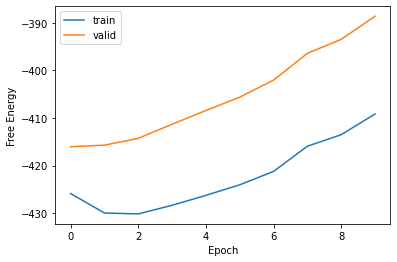

In [24]:
fig, ax = plt.subplots()
ax.plot(energy_train, label='train')
ax.plot(energy_valid, label='valid')
leg = ax.legend()
plt.xlabel("Epoch")
plt.ylabel("Free Energy")
plt.savefig("free_energy.png")
plt.show()

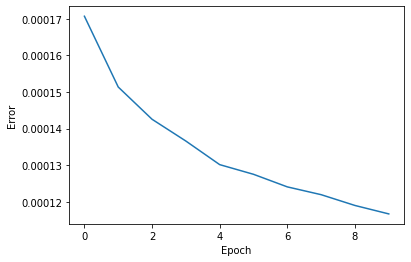

In [25]:
plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.savefig("error.png")
plt.show()

### SETUP TO LIST THE RESTAURANT RECOMMENDATIONS

In [89]:
# CUSTOMER NUMBER 22
user = 22
inputUser = [train[user]]

In [90]:
# Feeding in the User and Reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})

In [34]:
# Creating recommendation score for resto in our data
rating_df["Recommendation Score"] = rec[0]
rating_df

,customer_id_num,restaurant_id,restaurent_rating,list_index,Recommendation Score
0,0.0,106,4.5,0,0.000036
1,1.0,90,4.4,1,0.000048
2,2.0,106,4.5,2,0.000005
3,3.0,90,4.4,3,0.000045
4,4.0,43,4.3,4,0.002575
...,...,...,...,...,...
99995,9070.0,289,4.5,99995,0.000009
99996,3623.0,192,4.3,99996,0.000006
99997,7749.0,110,4.6,99997,0.000001
99998,12067.0,106,4.5,99998,0.000028


In [36]:
# Find the mock user's user_id from the data
cur_user_id = rating_df.iloc[user]['customer_id_num']
cur_user_id

22.0

In [37]:
# Find all resto the mock user has visited before
get_resto = rating_df[rating_df['customer_id_num'] == cur_user_id]['restaurant_id']
print(get_resto)

22        44
2320     105
3042     110
19209      4
27688    191
33688     13
33823     13
47257     90
71010     33
71931    289
74005     90
74259    189
91105    110
94878     90
95854    106
97847     28
98710    189
Name: restaurant_id, dtype: int64


In [38]:
# converting the pandas series object into a list
get_resto_id = get_resto.tolist()
print(get_resto_id)

[44, 105, 110, 4, 191, 13, 13, 90, 33, 289, 90, 189, 110, 90, 106, 28, 189]


In [45]:
# getting the resto names for the resto already visited by the user
get_resto_names = []
for resto in get_resto_id:
    get_resto_names.append(data[data['restaurant_id'] == resto]['restaurent_tag_name'].tolist()[0])
get_resto_names

['American,Burgers,Fries,Sandwiches',
 'American,Burgers,Free Delivery,Hot Dogs,Pasta',
 'Asian,Dimsum,Grills,Japanese,Rice,Soups',
 'Arabic,Breakfast,Burgers,Desserts,Free Delivery,Grills,Lebanese,Salads,Sandwiches,Shawarma',
 'Fresh Juices,Milkshakes,Mojitos ,Sandwiches,Shawarma',
 'Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Salads,Sandwiches,Soups',
 'Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Salads,Sandwiches,Soups',
 'American,Burgers,Desserts,Mojitos ,Pasta',
 'Desserts,Mexican',
 'American,Burgers,Fries,Mojitos ',
 'American,Burgers,Desserts,Mojitos ,Pasta',
 'Sandwiches,Shawarma,Fresh Juices,Mojitos,Milkshakes',
 'Asian,Dimsum,Grills,Japanese,Rice,Soups',
 'American,Burgers,Desserts,Mojitos ,Pasta',
 'American,Burgers,Free Delivery,Hot Dogs,Pasta',
 'Burgers',
 'Sandwiches,Shawarma,Fresh Juices,Mojitos,Milkshakes']

In [72]:
# Find all resto the mock user has 'not' vsited before
unvisited_resto = resto_df[resto_df['customer_id_num'] == cur_user_id]['restaurant_id']
unvisited_resto_id = unvisited_resto.tolist()

In [73]:
# extract the ratings of all the unvistied resto from ratings dataframe
unvisited_with_score = rating_df[rating_df['restaurant_id'].isin(unvisited_resto_id)]
unvisited_with_score

,customer_id_num,restaurant_id,restaurent_rating,list_index,Recommendation Score
0,0.0,106,4.5,0,0.000036
1,1.0,90,4.4,1,0.000048
2,2.0,106,4.5,2,0.000005
3,3.0,90,4.4,3,0.000045
6,6.0,189,4.3,6,0.000006
...,...,...,...,...,...
99994,9768.0,289,4.5,99994,0.000051
99995,9070.0,289,4.5,99995,0.000009
99997,7749.0,110,4.6,99997,0.000001
99998,12067.0,106,4.5,99998,0.000028


In [74]:
# grouping the unvisited data on resto id and taking the mean of the recommendation scores for each resto
grouped_unvisited = unvisited_with_score.groupby('restaurant_id', as_index=False)[
    'Recommendation Score'].mean()
grouped_unvisited

,restaurant_id,Recommendation Score
0,4,0.000061
1,13,0.000066
2,28,0.000067
3,33,0.000073
4,44,0.000065
5,90,0.000060
6,105,0.000071
7,106,0.000052
8,110,0.000066
9,189,0.000071


In [91]:
# getting the names of the unvisited resto
unvisited_resto_names = []
unvisited_resto_scores = []
for resto in grouped_unvisited['restaurant_id']:
    unvisited_resto_names.append(
        data[data['restaurant_id'] == resto]['restaurent_tag_name'].tolist()[0])
    unvisited_resto_scores.append(
        grouped_unvisited[grouped_unvisited['restaurant_id'] == resto]['Recommendation Score'].tolist()[0])
    

In [95]:
# creating a data frame for unvisited resto with their names,recommendation scores
unvisited_with_score = pd.DataFrame({
    'restaurant_name': unvisited_resto_names,
    'score': unvisited_resto_scores
})

# creating a data frame for visited resto with the names 
visited_with_names = pd.DataFrame({
    'restaurant_name': get_resto_names
})

# sort the result in descending order of the recommendation score
sorted_result = unvisited_with_score.sort_values( by='score', ascending=False)

### SEE THE RECOMMENDATIONS

In [96]:
print('The restaurant visited by the user are:'.upper())
# print(visited_with_names)
for idx, row in visited_with_names.iterrows():
    print(row['restaurant_name'])

THE RESTAURANT VISITED BY THE USER ARE:
American,Burgers,Fries,Sandwiches
American,Burgers,Free Delivery,Hot Dogs,Pasta
Asian,Dimsum,Grills,Japanese,Rice,Soups
Arabic,Breakfast,Burgers,Desserts,Free Delivery,Grills,Lebanese,Salads,Sandwiches,Shawarma
Fresh Juices,Milkshakes,Mojitos ,Sandwiches,Shawarma
Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Salads,Sandwiches,Soups
Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Salads,Sandwiches,Soups
American,Burgers,Desserts,Mojitos ,Pasta
Desserts,Mexican
American,Burgers,Fries,Mojitos 
American,Burgers,Desserts,Mojitos ,Pasta
Sandwiches,Shawarma,Fresh Juices,Mojitos,Milkshakes
Asian,Dimsum,Grills,Japanese,Rice,Soups
American,Burgers,Desserts,Mojitos ,Pasta
American,Burgers,Free Delivery,Hot Dogs,Pasta
Burgers
Sandwiches,Shawarma,Fresh Juices,Mojitos,Milkshakes


In [97]:
print('The restaurant recommended to the user are:'.upper())
for idx, row in sorted_result.iterrows():
    print(f"{row['restaurant_name']}")
# sorted_result # see the dataframe

THE RESTAURANT RECOMMENDED TO THE USER ARE:
Fresh Juices,Milkshakes,Mojitos ,Sandwiches,Shawarma
Desserts,Mexican
American,Burgers,Free Delivery,Hot Dogs,Pasta
Sandwiches,Shawarma,Fresh Juices,Mojitos,Milkshakes
Burgers
Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Salads,Sandwiches,Soups
Asian,Dimsum,Grills,Japanese,Rice,Soups
American,Burgers,Fries,Sandwiches
Arabic,Breakfast,Burgers,Desserts,Free Delivery,Grills,Lebanese,Salads,Sandwiches,Shawarma
American,Burgers,Desserts,Mojitos ,Pasta
American,Burgers,Fries,Mojitos 
American,Burgers,Free Delivery,Hot Dogs,Pasta
